### Statistical Analysis
---

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
from scipy.stats import skew 


data = pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


##### Features selected are as follows:
- targeted_productivity
- actual_productivity
- over_time
- incentive

---

In [2]:
tp_data = data['targeted_productivity']
ap_data = data['actual_productivity']
ot_data = data['over_time']
inc_data = data['incentive']

In [3]:
tp_len = len(tp_data)
ap_len = len(ap_data)
ot_len = len(ot_data)
inc_len = len(inc_data)

In [4]:
tp_sum = sum(tp_data)
ap_sum = sum(ap_data)
ot_sum = sum(ot_data)
inc_sum = sum(inc_data)

In [5]:
# Mean
def mean(data_sum, data_len):
    data_mean = data_sum/data_len
    return data_mean

print('Mean of targeted_productivity: ', mean(tp_sum, tp_len))
print('Mean of actual_productivity: ', mean(ap_sum, ap_len))
print('Mean of over_time: ', mean(ot_sum, ot_len))
print('Mean of incentive: ', mean(inc_sum, inc_len))

Mean of targeted_productivity:  0.7296324143692557
Mean of actual_productivity:  0.7350910969791159
Mean of over_time:  4567.460317460317
Mean of incentive:  38.21052631578947


In [6]:
# Sort for median
tp_data = tp_data.sort_values(ascending=True)
ap_data = ap_data.sort_values(ascending=True)
ot_data = ot_data.sort_values(ascending=True)
inc_data = inc_data.sort_values(ascending=True)

In [7]:
# Median
def median(data, data_len):
    if data_len % 2 == 0:
        median1 = data[data_len//2] 
        median2 = data[data_len//2 - 1] 
        median = (median1 + median2)/2
    else:
        median = data[data_len//2] 
    return median
    
print('Median of targeted_productivity: ', median(tp_data, tp_len))
print('Median of actual_productivity: ', median(ap_data, ap_len))
print('Median of over_time: ', median(ot_data, ot_len))
print('Median of incentive: ', median(inc_data, inc_len))

Median of targeted_productivity:  0.6
Median of actual_productivity:  0.415172414
Median of over_time:  6960
Median of incentive:  0


In [8]:
# Mode
def mode(col_data):
   data = collections.Counter(col_data)
   data_dict = dict(data)
   max_freq = max(list(data.values()))
   mode_val = [num for num, freq in data_dict.items() if freq == max_freq]
   if len(mode_val) == len(col_data):
      print("No mode")
   else:
      return mode_val
      
print("Mode of targeted_productivity:", mode(tp_data))
print("Mode of actual_productivity:", mode(ap_data))
print("Mode of over_time:", mode(ot_data))
print("Mode of incentive:", mode(inc_data))

Mode of targeted_productivity: [0.8]
Mode of actual_productivity: [0.800401961]
Mode of over_time: [960]
Mode of incentive: [0]


In [9]:
# Range
def dataset_range(data):
    ub = max(data)
    lb = min(data)
    return(lb,ub)

print("Range of targeted_productivity:", dataset_range(tp_data))
print("Range of actual_productivity:", dataset_range(ap_data))
print("Range of over_time:", dataset_range(ot_data))
print("Range of incentive:", dataset_range(inc_data))

Range of targeted_productivity: (0.07, 0.8)
Range of actual_productivity: (0.233705476, 1.1204375)
Range of over_time: (0, 25920)
Range of incentive: (0, 3600)


In [10]:
# 5 number summary
# min, q1, median, q3, max
def numb_summary(data, data_len):
    sorted_data = sorted(data)
    ub = max(data)
    lb = min(data)
    data_median = median(sorted_data, data_len)
    q1_position = int(0.25 * data_len)
    q3_position = int(0.75 * data_len)
    q1 = sorted_data[q1_position]
    q3 = sorted_data[q3_position]
    return(lb, q1, data_median, q3, ub)

print("Summary of targeted_productivity:", numb_summary(tp_data, tp_len))
print("Summary of actual_productivity:", numb_summary(ap_data, ap_len))
print("Summary of over_time:", numb_summary(ot_data, ot_len))
print("Summary of incentive:", numb_summary(inc_data, inc_len))

Summary of targeted_productivity: (0.07, 0.7, 0.75, 0.8, 0.8)
Summary of actual_productivity: (0.233705476, 0.650307143, 0.773333333, 0.850252525, 1.1204375)
Summary of over_time: (0, 1440, 3960, 6960, 25920)
Summary of incentive: (0, 0, 0, 50, 3600)


In [11]:
# Outliers
def outliers(data, data_len):
    sorted_data = sorted(data)
    q1_position = int(0.25 * data_len)
    q3_position = int(0.75 * data_len)
    q1 = sorted_data[q1_position]
    q3 = sorted_data[q3_position]
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
print("Outliers of targeted_productivity:", outliers(tp_data, tp_len))
print("Outliers of actual_productivity:", outliers(ap_data, ap_len))
print("Outliers of over_time:", outliers(ot_data, ot_len))
print("Outliers of incentive:", outliers(inc_data, inc_len))

Outliers of targeted_productivity: 633     0.07
685     0.35
259     0.35
961     0.35
239     0.35
        ... 
1124    0.50
515     0.50
821     0.50
969     0.50
503     0.50
Name: targeted_productivity, Length: 79, dtype: float64
Outliers of actual_productivity: 147     0.233705
317     0.235795
765     0.238042
215     0.246250
258     0.247316
863     0.249417
843     0.251399
842     0.256500
802     0.258000
497     0.259375
579     0.260979
415     0.261174
1086    0.263694
1149    0.264062
921     0.268214
984     0.271875
963     0.271875
1127    0.271875
691     0.272000
578     0.280333
784     0.283054
883     0.283958
496     0.285333
541     0.286985
783     0.287042
577     0.295308
822     0.302117
1046    0.302770
841     0.303574
882     0.307501
1045    0.309333
257     0.311207
298     0.313853
560     0.314167
920     0.325000
392     0.327407
840     0.328132
436     0.329545
801     0.329965
125     0.330114
1067    0.332146
256     0.332359
169     0.337973
10

In [12]:
# # Symmetric or Skewed
def skewed(data):
    skew_val = skew(data, axis=0, bias=False)
    if skew_val > 0:
        return "is postively skewed with value = " + str(skew_val)
    elif skew_val < 0:
        return "is negatively skewed with value = " + str(skew_val)
    elif skew_val == 0:
        return "is normally distributed with value = " + str(skew_val)
    
print("Skewness of targeted_productivity:", skewed(tp_data))
print("Skewness of actual_productivity:",  skewed(ap_data))
print("Skewness of over_time:",  skewed(ot_data))
print("Skewness of incentive:",  skewed(inc_data))

Skewness of targeted_productivity: is negatively skewed with value = -2.1441500332521986
Skewness of actual_productivity: is negatively skewed with value = -0.8074917745097558
Skewness of over_time: is postively skewed with value = 0.6732872952976456
Skewness of incentive: is postively skewed with value = 15.790746016958247


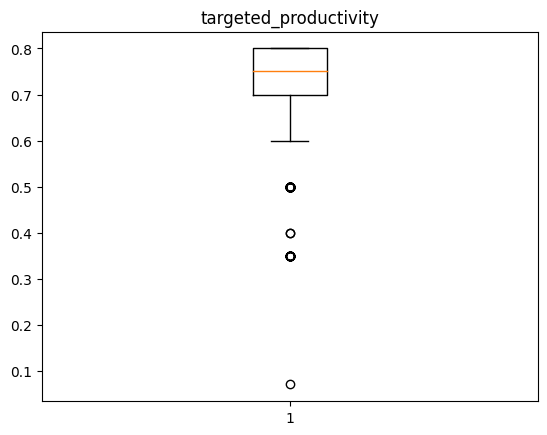

In [13]:
# Boxplot
plt.boxplot(tp_data)
plt.title('targeted_productivity')
plt.show()


Text(0.5, 1.0, 'actual_productivity')

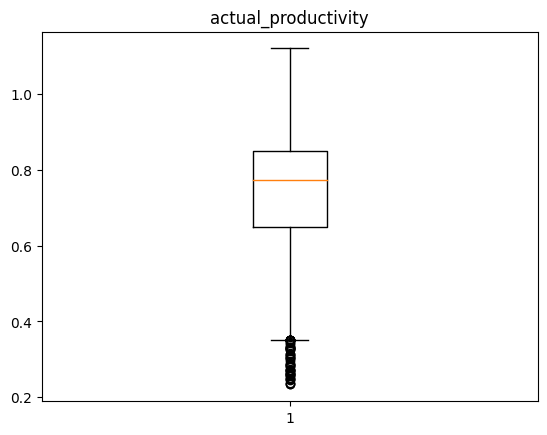

In [14]:
plt.boxplot(ap_data)
plt.title('actual_productivity')

Text(0.5, 1.0, 'over_time')

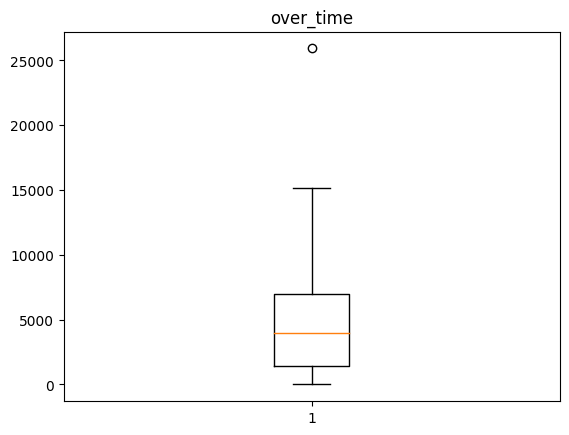

In [15]:
plt.boxplot(ot_data)
plt.title('over_time')

Text(0.5, 1.0, 'incentive')

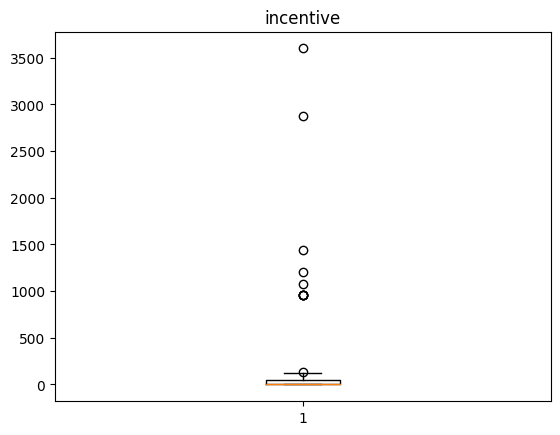

In [16]:
plt.boxplot(inc_data)
plt.title('incentive')